# Heart Disease Prediction: Logistic Regression Evaluation and Imbalanced Data Handling.

# Step 1: Import libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import warnings 
warnings.filterwarnings('ignore')

# Step 2: Load dataset

In [134]:
df = pd.read_excel(r"C:\Users\anshu\OneDrive\Desktop\heart.xlsx")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Step 3:  Exploratory Data Analysis (EDA)

## Display the top 5 rows of the dataframe¶

In [135]:
df_shape =df.shape 
print("Data shape:", df_shape)

Data shape: (1025, 14)


In [136]:
df.rename(columns={'target': 'heart_diagnosis'},inplace = True)

In [131]:
df=df.head(5)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Print the shape of the dataframe

In [137]:
df_shape =df.shape 
print("Data shape:", df_shape)

Data shape: (1025, 14)


## Information about data


In [138]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1025 non-null   int64  
 1   sex              1025 non-null   int64  
 2   cp               1025 non-null   int64  
 3   trestbps         1025 non-null   int64  
 4   chol             1025 non-null   int64  
 5   fbs              1025 non-null   int64  
 6   restecg          1025 non-null   int64  
 7   thalach          1025 non-null   int64  
 8   exang            1025 non-null   int64  
 9   oldpeak          1025 non-null   float64
 10  slope            1025 non-null   int64  
 11  ca               1025 non-null   int64  
 12  thal             1025 non-null   int64  
 13  heart_diagnosis  1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Drop the rows with missing values

In [139]:
df.dropna(inplace=True)    

## Check null values 

In [140]:
df_null_count = df.isnull().sum()
df_null_count

age                0
sex                0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

## Summary statistics


In [141]:
#For numerical columns
df_summary_numeric=df.describe(include='all')
df_summary_numeric

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Check correlations
* The correlation heatmap shows the correlation between all the numerical variables. This indicates which variables are related to the target and to each other.The magnitude and sign indicate the strength and direction of linear relation.

Hints:

1. You need to run corr on your dataframe
2. Pass the variable containing correlation information to heatmap
3. We are setting numeric_only=True to run correlation on only numeric variables

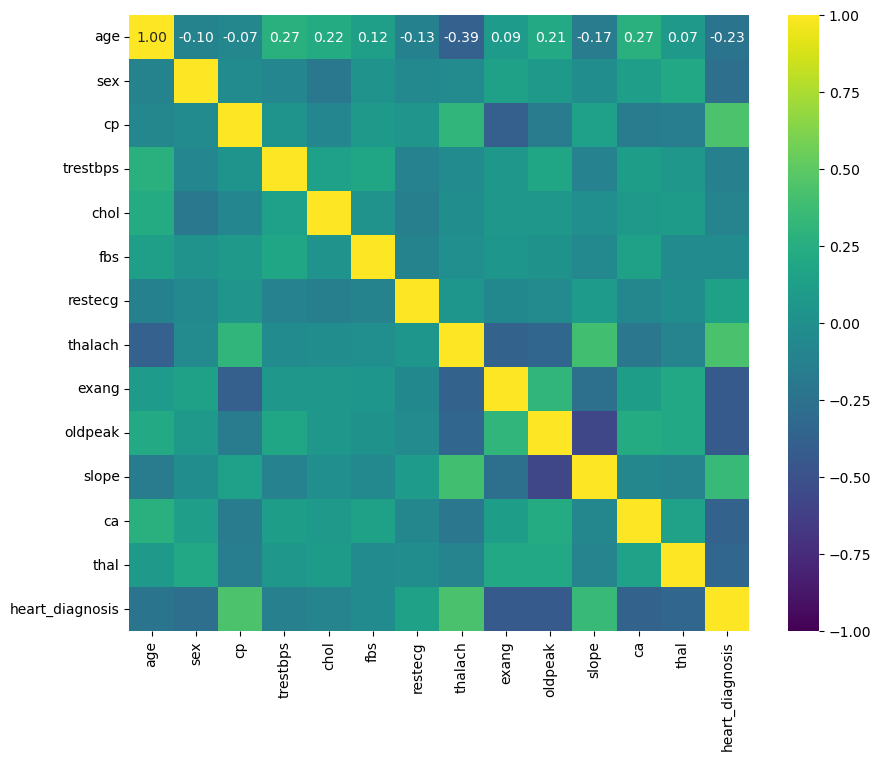

In [142]:
plt.figure(figsize=(10, 8))
corr = df.corr()
correlation_heatmap=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True, cmap = 'viridis', vmin = -1, vmax = 1, center = 0,  fmt=".2f")
plt.show()

## Check distribution of the target variable
Hints:

You can use the value_counts method on the target column


In [143]:
heart_diagnosis_distribution = df['heart_diagnosis'].value_counts()
print("Target variable distribution:\n", heart_diagnosis_distribution)

Target variable distribution:
 heart_diagnosis
1    526
0    499
Name: count, dtype: int64


## Histograms of all numerical columns
Hints:

1.For defining the number of columns and rows for subplots:

2.Calculate the number of columns in your DataFrame using df.shape[1].
3.Determine the number of rows needed for subplots by subtracting 1 from the number of columns and then using integer division (// 2 + 1).
4.For creating subplots:

5.Use plt.subplots() to create subplots. Specify the number of rows and columns using the values calculated in step 2.
6.Adjust the vertical spacing between subplots using fig.subplots_adjust(hspace=0.5) to avoid overlapping.
7.For flattening the axes array:

8.Flatten the 2D array of subplot axes into a 1D array using axes = axes.flatten() for easier iteration.
9.For plotting histograms for each column:

10.Use a for loop to iterate through each column in the DataFrame.
11.Skip plotting the target variable (e.g., 'heart_diagnosis') if it's in the DataFrame by using a conditional statement.
12.Access the data in the column using df[column].
13.Set the color of the histogram using the color parameter when calling ax.hist().
14.Specify the number of bins for the histogram using the bins parameter when calling ax.hist().
15.Set an appropriate title for the subplot using ax.set_title().
16.Label the x and y axes with descriptions of the data using ax.set_xlabel() and ax.set_ylabel().
17.Adjust the fontsize for better legibility by setting the fontsize parameter for titles, labels, etc.
18.Show each individual plot using plt.show() within the loop.
19.For removing any empty subplots:

20.After the loop, remove any empty subplots that might remain by using fig.delaxes().
21.for displaying the subplots:

22.Finally, display the subplots by calling plt.show() at the end of your code.

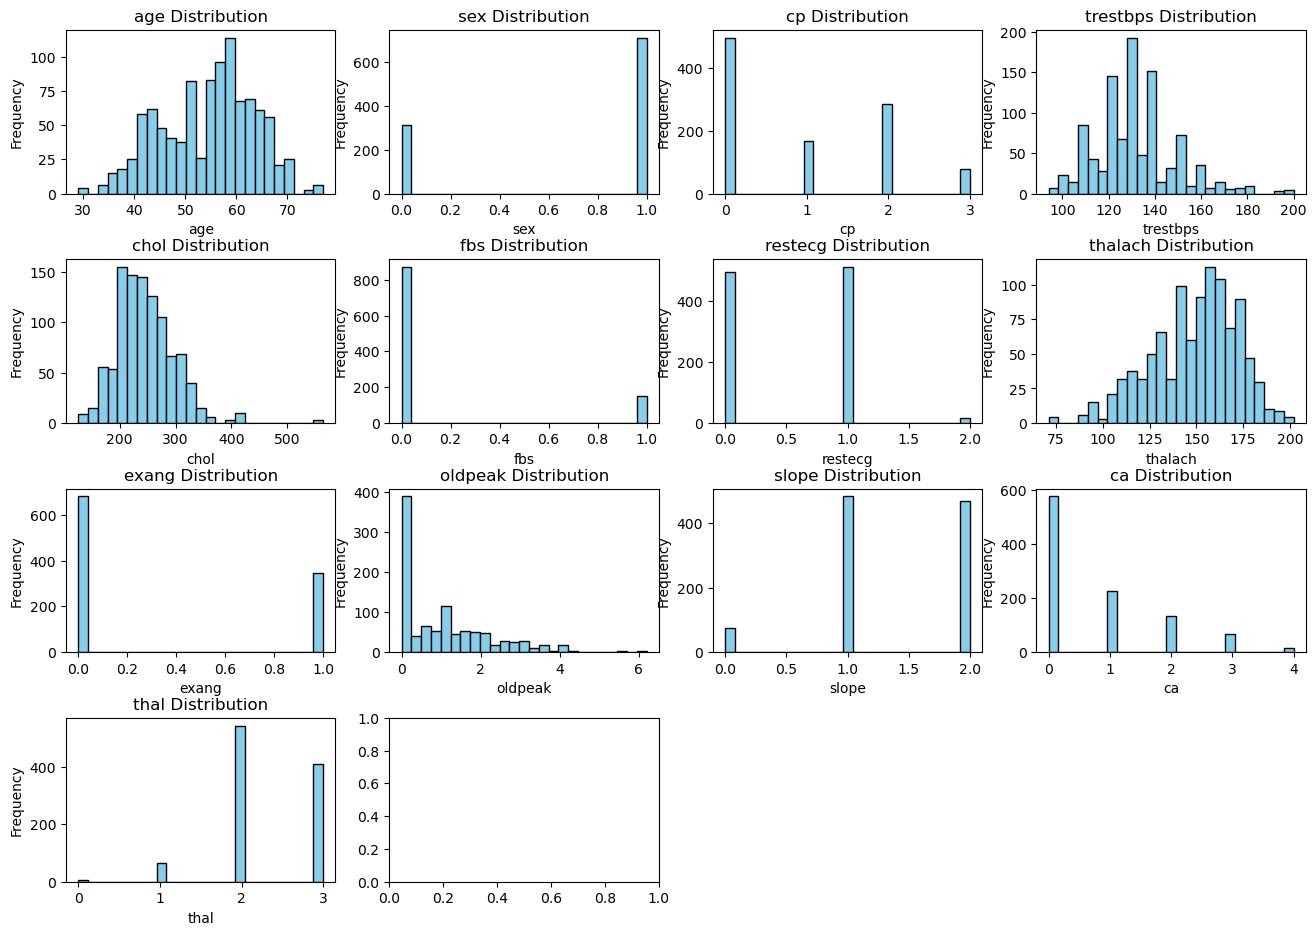

In [144]:
# Define the number of columns and rows for subplots
num_cols = df.shape[1]  # Number of columns in the DataFrame
num_rows = (num_cols - 1) // 2 + 1  # Calculate the number of rows needed for subplots (2 plots per row)

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(16, 20))
fig.subplots_adjust(hspace=0.4)  # Adjust vertical spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(df.columns):
    if column == 'heart_diagnosis':  # Skip the target variable
        continue
    ax = axes[i]
    ax.hist(df[column], bins=25, color='skyblue', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)  # Set the label for the x-axis
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Show the subplots
plt.show()


##  Step 4: Target column preprocessing

* heart_diagnosis: Diagnosis of heart disease (angiographic disease status) (0 = No heart disease, >0 = heart disease)."

Hints:

1. Write a lambda function that will assign 0 when heart_diagnosis is 0 and and when >=0 as 1

In [145]:
df['heart_diagnosis'] = df['heart_diagnosis'].apply(lambda x: 'Disease' if x == 1 else 'No Disease')


In [146]:
heart_diagnosis_distribution_pp = df['heart_diagnosis'].value_counts()
print("Target variable distribution after preprocessing:\n", heart_diagnosis_distribution_pp)

Target variable distribution after preprocessing:
 heart_diagnosis
Disease       526
No Disease    499
Name: count, dtype: int64


## Step 5:Transform the categorical features which have more than two classes
* The binary categorical columns are already good to use as it is, since they already only have 0 and 1 classes.

Hints:

1. Define the subset of columns to one-hot encode

2. Perform one-hot encoding on the selected columns and concatenate with the original DataFrame

3. Drop the original columns that were one-hot encoded)

In [147]:
columns_to_encode = ['cp', 'restecg', 'ca', 'thal']
df[columns_to_encode] = df[columns_to_encode].astype(str)

# Perform one-hot encoding on the specified columns
df = pd.concat([df, pd.get_dummies(df[columns_to_encode])], axis=1)

# Drop the original categorical columns
df.drop(columns=columns_to_encode, inplace=True)


In [148]:
# Display the column names after encoding
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'heart_diagnosis', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [118]:
# Display the top 5 rows of the dataset
df.head(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,heart_diagnosis,...,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,No Disease,...,False,False,False,True,False,False,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,No Disease,...,False,True,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,No Disease,...,False,True,False,False,False,False,False,False,False,True
3,61,1,148,203,0,161,0,0.0,2,No Disease,...,False,False,True,False,False,False,False,False,False,True
4,62,0,138,294,1,106,0,1.9,1,No Disease,...,False,False,False,False,True,False,False,False,True,False
5,58,0,100,248,0,122,0,1.0,1,Disease,...,False,True,False,False,False,False,False,False,True,False
6,58,1,114,318,0,140,0,4.4,0,No Disease,...,True,False,False,False,True,False,False,True,False,False
7,55,1,160,289,0,145,1,0.8,1,No Disease,...,False,False,True,False,False,False,False,False,False,True
8,46,1,120,249,0,144,0,0.8,2,No Disease,...,False,True,False,False,False,False,False,False,False,True
9,54,1,122,286,0,116,1,3.2,1,No Disease,...,False,False,False,True,False,False,False,False,True,False


# Step 6: Split data into train and test sets
Hints:

Create feature matrix X by dropping the target variable ("heart_diagnosis") from the DataFrame df.

Create a target vector y by selecting the target variable ("heart_diagnosis") from the DataFrame df.

Split the data into training and test sets using the train_test_split function. Specify X as the input features, y as the target variable, set test_size to 0.2 for an 80/20 split, and use random_state for reproducibility.

In [149]:
# Define the features (X) and the target variable (y)
X = df.drop('heart_diagnosis', axis=1)  # Features (drop the target column)
y = df['heart_diagnosis']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (820, 25)
X_test shape: (205, 25)
y_train shape: (820,)
y_test shape: (205,)


# Step 7: Scaling numeric features
Normalization of Feature Scales:
Feature scaling ensures that all numeric features in a dataset have similar scales or ranges. It prevents certain features from dominating the learning process due to their larger scale, making the model more balanced.

Categorical features, on the other hand, are typically non-numeric and represent categories or labels rather than continuous values. Scaling categorical features is not meaningful because the scaling process would not preserve the categorical information
Hints:

Create a StandardScaler Object:

Create an instance of the StandardScaler from scikit-learn and assign it to the scaler variable.
This step initializes the scaler, allowing you to use it for feature scaling.
Fit the Scaler to the Training Data:

Use the fit_transform method on the scaler object to fit it to the training data (X_train) and simultaneously transform (fit_transform) the training data to scale its numeric features.
This step calculates the mean and standard deviation of each numeric feature in the training data and scales the features accordingly.
Transform the Test Data:

Use the transform method on the scaler object to transform the test data (X_test) using the same scaling parameters learned from the training data.
This step ensures that the test data is scaled consistently with the training data, which is crucial for accurate model evaluation.

In [150]:
# Displaying the columns in the training data
X_train.columns 

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [151]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the specified numeric features in the training set
X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']] = (
    scaler.fit_transform(X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']])
)

# Scale the specified numeric features in the test set
X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']] = (
    scaler.transform(X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']])
)


#  Skewed data

# Step 8 : Build and evaluate the base line model

Hints:

Create a logistic regression model instance by initializing LogisticRegression().

Train the logistic regression model by fitting it to the training data. Use the fit method and provide X_train (training features) and y_train (training labels) as input.

Make predictions on the test data using the trained model. Use the predict method with X_test as input to generate y_pred.

In [152]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 9: Print the metrics of model developed using skewed data
Confusion matrix visualizes the number of true positives, true negatives, false positives, and false negatives in the model's predictions.

Classification report containing key metrics like precision, recall, and F1-score, for evaluating the model's performance.

Hints:

Compute the accuracy score of the model by comparing predictions (y_pred_skewed) to true labels (y_test).

Compute the roc auc score of the model using predictions (y_pred_skewed) and true labels (y_test).

In [153]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

accuracy_skewed = accuracy_score(y_test, y_pred)
auc_roc_skewed = roc_auc_score(y_test, y_pred_proba)  # Use predicted probabilities
conf_matrix_skewed = confusion_matrix(y_test, y_pred)
class_report_skewed = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy_skewed)
print("AUC-ROC Score:", auc_roc_skewed)
print('Confusion Matrix:\n', conf_matrix_skewed)
print('Classification Report:\n', class_report_skewed)

Accuracy: 0.8195121951219512
AUC-ROC Score: 0.9097658480868076
Confusion Matrix:
 [[92 11]
 [26 76]]
Classification Report:
               precision    recall  f1-score   support

     Disease       0.78      0.89      0.83       103
  No Disease       0.87      0.75      0.80       102

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



# Step 9: Feature importance of model developed using skewed data
Hints:

Obtain the coefficients of the logistic regression model using the coef_ attribute and assign them to model_coefs.

Retrieve the intercept of the logistic regression model using the intercept_ attribute and assign it to model_intercept.

In [154]:
# After fitting the model
model_coefs = model.coef_[0]  # For binary classification, it returns an array with one row
model_intercept = model.intercept_[0]  # Intercept is a single value for binary classification

print('Coefficients:', model_coefs)
print('Intercept:', model_intercept)


Coefficients: [-0.24163839  1.51154241  0.40462889  0.41916537 -0.30438226 -0.61297982
  0.64576054  0.58138729 -0.40996011  1.26385055  0.0144875  -0.39738318
 -0.88203351  0.03344786 -0.20644306  0.17191656 -1.53197528  0.54223988
  1.48372723  0.77359579 -1.26866626  0.62603364 -0.86404166 -0.61809845
  0.85502782]
Intercept: -0.9141457553558281


###
Negative coefficients in logistic regression indicate an inverse relationship between the feature and the probability of the event (positive class).
An increase in the feature's value tends to decrease the predicted probability of the event occurring, while a decrease in the feature's value tends to increase the predicted probability.
It's common to use the absolute values of coefficients, especially when we want to focus on the overall importance of each feature without being concerned about the direction of impact.
Hints:

1.Calculate the absolute values of the coefficients and assign them to the 'Importance' column. Use X.columns for the 'Feature' column to capture the feature names.

2.Sort the importances DataFrame in descending order based on the 'Importance' column using the sort_values method. Set the ascending parameter to False to get the most important features first. 

In [155]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
importances = importances.sort_values('Importance', ascending=False)
print('Feature Importances:\n', importances)


Feature Importances:
       Feature  Importance
16       ca_0    1.531975
1         sex    1.511542
18       ca_2    1.483727
20       ca_4    1.268666
9        cp_0    1.263851
12       cp_3    0.882034
22     thal_1    0.864042
24     thal_3    0.855028
19       ca_3    0.773596
6       exang    0.645761
21     thal_0    0.626034
23     thal_2    0.618098
5     thalach    0.612980
7     oldpeak    0.581387
17       ca_1    0.542240
3        chol    0.419165
8       slope    0.409960
2    trestbps    0.404629
11       cp_2    0.397383
4         fbs    0.304382
0         age    0.241638
14  restecg_1    0.206443
15  restecg_2    0.171917
13  restecg_0    0.033448
10       cp_1    0.014488


# Undersampled data
# Step 10: Undersample the training data
Hints:

Create a RandomUnderSampler instance and assign it correcly
Use the instance created to under sample the training data 

In [156]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling
X_undersample, y_undersample = rus.fit_resample(X_train, y_train)

# Print the shapes of the undersampled and original datasets
print("X_undersample shape:", X_undersample.shape)
print("X_test shape:", X_test.shape)
print("y_undersample shape:", y_undersample.shape)
print("y_test shape:", y_test.shape)


X_undersample shape: (794, 25)
X_test shape: (205, 25)
y_undersample shape: (794,)
y_test shape: (205,)


# Step 11 : Build and evaluate the model using undersampled data
Hints:

Create a logistic regression model instance by initializing LogisticRegression().

Train the logistic regression model by fitting it to the training data. Use the fit method and provide X_undersample (training features) and y_undersample (training labels) as input.

Make predictions on the test data using the trained model. Use the predict method with X_test as input to generate y_pred_undersampled.



In [158]:
# Step 1: Create a logistic regression model instance
model_undersampled = LogisticRegression()

# Step 2: Train the model by fitting it to the training data
model_undersampled.fit(X_undersample, y_undersample)

# Step 3: Make predictions on the test data
y_pred_undersampled = model_undersampled.predict(X_test)


# Step 12: Print the metrics of model developed using undersampled data
Hints:

Compute the accuracy score of the model by comparing predictions (y_pred_undersampled) to true labels (y_test).

Generate a confusion matrix to visualize the number of true positives, true negatives, false positives, and false negatives in the model's predictions.

Calculate the roc_auc_score and assign it to auc_roc_undersampled

In [159]:
# Calculate the accuracy score
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)

# Calculate the ROC AUC score
auc_roc_undersampled = roc_auc_score(y_test, model_undersampled.predict_proba(X_test)[:, 1])

# Generate the confusion matrix
conf_matrix_undersampled = confusion_matrix(y_test, y_pred_undersampled)

# Generate the classification report
class_report_undersampled = classification_report(y_test, y_pred_undersampled)

# Print the evaluation metrics
print('Accuracy:', accuracy_undersampled)
print('Confusion Matrix:\n', conf_matrix_undersampled)
print('Classification Report:\n', class_report_undersampled)


Accuracy: 0.8195121951219512
Confusion Matrix:
 [[92 11]
 [26 76]]
Classification Report:
               precision    recall  f1-score   support

     Disease       0.78      0.89      0.83       103
  No Disease       0.87      0.75      0.80       102

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



# Step 13: Feature importance of model developed using undersampled data
Hints:

1.Obtain the coefficients of the logistic regression model using the coef_ attribute and assign them to model_coefs.

2.Retrieve the intercept of the logistic regression model using the intercept_ attribute and assign it to model_intercept.

In [160]:
# Obtain the coefficients of the logistic regression model
model_undersampled_coefs = model_undersampled.coef_[0]  # Get the first row of coefficients
model_undersampled_intercept = model_undersampled.intercept_[0]  # Get the intercept

# Print the coefficients and intercept
print('Coefficients:', model_undersampled_coefs)
print('Intercept:', model_undersampled_intercept)


Coefficients: [-0.21495861  1.52516916  0.39486813  0.40726448 -0.35029082 -0.58698344
  0.60767697  0.60115742 -0.39626823  1.27817675 -0.00500842 -0.36314985
 -0.90991805  0.03342527 -0.19808423  0.16475939 -1.52876211  0.48171939
  1.417414    0.90569811 -1.27596896  0.6197023  -0.82836666 -0.63468872
  0.84345351]
Intercept: -0.8502891589626479


### 
1. Negative coefficients in logistic regression indicate an inverse relationship between the feature and the probability of the event (positive class).
2. An increase in the feature's value tends to decrease the predicted probability of the event occurring, while a decrease in the feature's value tends to increase the predicted probability.
3. It's common to use the absolute values of coefficients, especially when we want to focus on the overall importance of each feature without being concerned about the direction of impact.

Hints:

1. Calculate the absolute values of the coefficients and assign them to the 'Importance' column. Use X.columns for the    'Feature' column to capture the feature names.

2. Sort the importances DataFrame in descending order based on the 'Importance' column using the sort_values method. Set the ascending parameter to False to get the most important features first.

In [161]:
# Calculate feature importances
importances_undersampled = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model_undersampled.coef_[0])})

# Sort the DataFrame by Importance in descending order
importances_undersampled = importances_undersampled.sort_values('Importance', ascending=False)

# Print the feature importances
print('Feature Importances:\n', importances_undersampled)


Feature Importances:
       Feature  Importance
16       ca_0    1.528762
1         sex    1.525169
18       ca_2    1.417414
9        cp_0    1.278177
20       ca_4    1.275969
12       cp_3    0.909918
19       ca_3    0.905698
24     thal_3    0.843454
22     thal_1    0.828367
23     thal_2    0.634689
21     thal_0    0.619702
6       exang    0.607677
7     oldpeak    0.601157
5     thalach    0.586983
17       ca_1    0.481719
3        chol    0.407264
8       slope    0.396268
2    trestbps    0.394868
11       cp_2    0.363150
4         fbs    0.350291
0         age    0.214959
14  restecg_1    0.198084
15  restecg_2    0.164759
13  restecg_0    0.033425
10       cp_1    0.005008


# Oversample data
# Step 14: Oversample the training data
Hints:

Create a SMOTE instance and assign it correcly
Use the instance created to over sample the training data

In [163]:
# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Use the SMOTE instance to oversample the training data
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

# Print the shapes of the oversampled data and the test data
print("X_oversample shape:", X_oversample.shape)
print("X_test shape:", X_test.shape)
print("y_oversample shape:", y_oversample.shape)
print("y_test shape:", y_test.shape)


X_oversample shape: (846, 25)
X_test shape: (205, 25)
y_oversample shape: (846,)
y_test shape: (205,)


# Step 15 : Build and evaluate the model develped using oversampled data
Hints:

Create a logistic regression model instance by initializing LogisticRegression().

Train the logistic regression model by fitting it to the training data. Use the fit method and provide X_oversample (training features) and y_oversample (training labels) as input.

Make predictions on the test data using the trained model. Use the predict method with X_test as input to generate y_pred_oversampled.

In [164]:
# Create a logistic regression model instance
model_oversampled = LogisticRegression()

# Train the logistic regression model with the oversampled data
model_oversampled.fit(X_oversample, y_oversample)

# Make predictions on the test data
y_pred_oversampled = model_oversampled.predict(X_test)


# Step 16: Print the metrics of the model developed using oversampled data
Hints:

Compute the accuracy score of the model by comparing predictions (y_pred_undersampled) to true labels (y_test).

Generate a confusion matrix to visualize the number of true positives, true negatives, false positives, and false negatives in the model's predictions.

Calculate the roc_auc_score and assign it to auc_roc_undersampled

Generate a classification report containing key metrics like precision, recall, and F1-score, for evaluating the model's performance.

In [165]:
import numpy as np

# Convert y_test to numeric values
y_test_numeric = np.where(y_test == 'No Disease', 0, 1)  # Assuming 'No Disease' is class 0 and 'Disease' is class 1
y_pred_oversampled_numeric = np.where(y_pred_oversampled == 'No Disease', 0, 1)

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Compute the accuracy score
accuracy_oversampled = accuracy_score(y_test_numeric, y_pred_oversampled_numeric)

# Calculate the AUC-ROC score
auc_roc_oversampled = roc_auc_score(y_test_numeric, y_pred_oversampled_numeric)

# Generate the confusion matrix
conf_matrix_oversampled = confusion_matrix(y_test_numeric, y_pred_oversampled_numeric)

# Generate the classification report
class_report_oversampled = classification_report(y_test_numeric, y_pred_oversampled_numeric)

# Print the metrics
print('Accuracy:', accuracy_oversampled)
print("AUC-ROC Score:", auc_roc_oversampled)
print('Confusion Matrix:\n', conf_matrix_oversampled)
print('Classification Report:\n', class_report_oversampled)



Accuracy: 0.8195121951219512
AUC-ROC Score: 0.819150961355416
Confusion Matrix:
 [[76 26]
 [11 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



# Step 17: Feature importance of the model developed using oversampled data
Hints:

Obtain the coefficients of the logistic regression model using the coef_ attribute and assign them to model_coefs.

Retrieve the intercept of the logistic regression model using the intercept_ attribute and assign it to model_intercept.

In [166]:
# Get the coefficients and intercept from the logistic regression model
model_oversampled_coefs = model_oversampled.coef_[0]  # coef_ returns an array of shape (1, n_features)
model_oversampled_intercept = model_oversampled.intercept_[0]  # intercept_ returns an array, take the first element

# Print the coefficients and intercept
print('Coefficients:', model_oversampled_coefs)
print('Intercept:', model_oversampled_intercept)


Coefficients: [-0.24463485  1.54595755  0.42629039  0.4173274  -0.35703078 -0.64120636
  0.62785127  0.59354141 -0.41062197  1.40994725  0.15675619 -0.24461192
 -0.74330488  0.0406262  -0.19818879  0.15782398 -1.42514021  0.63783748
  1.76392734  0.83433814 -1.23116418  0.63903393 -0.90831498 -0.58576262
  0.87340343]
Intercept: -1.1691518128909828


###
1. Negative coefficients in logistic regression indicate an inverse relationship between the feature and the probability of the event (positive class).
2. An increase in the feature's value tends to decrease the predicted probability of the event occurring, while a decrease in the feature's value tends to increase the predicted probability.
3. It's common to use the absolute values of coefficients, especially when we want to focus on the overall importance of each feature without being concerned about the direction of impact.
Hints:
1. Calculate the absolute values of the coefficients and assign them to the 'Importance' column. Use X.columns for the 'Feature' column to capture the feature names.

2. Sort the importances DataFrame in descending order based on the 'Importance' column using the sort_values method. Set the ascending parameter to False to get the most important features first.

In [167]:
import pandas as pd
import numpy as np

# Create a DataFrame for importances
importances_oversampled = pd.DataFrame({
    'Feature': X.columns,                    # Use feature names from the input DataFrame
    'Importance': np.abs(model_oversampled.coef_[0])  # Get absolute values of the coefficients
})

# Sort the DataFrame in descending order based on the Importance column
importances_oversampled = importances_oversampled.sort_values('Importance', ascending=False)

# Print the feature importances
print('Feature Importances:\n', importances_oversampled)


Feature Importances:
       Feature  Importance
18       ca_2    1.763927
1         sex    1.545958
16       ca_0    1.425140
9        cp_0    1.409947
20       ca_4    1.231164
22     thal_1    0.908315
24     thal_3    0.873403
19       ca_3    0.834338
12       cp_3    0.743305
5     thalach    0.641206
21     thal_0    0.639034
17       ca_1    0.637837
6       exang    0.627851
7     oldpeak    0.593541
23     thal_2    0.585763
2    trestbps    0.426290
3        chol    0.417327
8       slope    0.410622
4         fbs    0.357031
0         age    0.244635
11       cp_2    0.244612
14  restecg_1    0.198189
15  restecg_2    0.157824
10       cp_1    0.156756
13  restecg_0    0.040626
